## Visualization of jokes, per polititian: 2013~2017
### without NLP!

Let's assume those are the people we want to know more about

In [4]:
name_list = ["Hilary", "Clinton", "Obama", "Bush", "Trump", "Biden", "Cheney", "Ajit", "McCain", "Palin"]

In [1]:
from __future__ import division
import nltk
from nltk.stem.porter import PorterStemmer
import math
import numpy
import pandas as pd
import re
import numpy as np

In [2]:
jokes_df = pd.read_csv("all_r_jokes.csv", delimiter=',',quotechar='|')
jokes_df.columns=['id', 'timestamp', 'q', 'a']

## create function so that we can count the appearance of each name

In [3]:
def countStr(doc,subs):
    if (doc is None ):
        print('doc is None')
        return 0
    if (not isinstance(doc, str)):
        print('doc is not a String')
        return 0
    doc = re.sub('[^a-z0-9]', ' ', doc.lower())
    return doc.count(subs.lower())

In [7]:
for name in name_list:
    jokes_df[name] = jokes_df.apply(lambda x: countStr(x['q'], name.lower()) + countStr(x['a'], name.lower()), axis=1)

doc is not a String
doc is not a String
doc is not a String
doc is not a String
doc is not a String
doc is not a String
doc is not a String
doc is not a String
doc is not a String
doc is not a String


Instead of registering boolean of which name occurs, store the information of occurance of each name in the joke. 
Boolean information can be deduced from occurance numbers, but not the other way around.

A peak of the info we hnave here: 

In [9]:
jokes_df[jokes_df['Obama']>1].sample(2)

,id,timestamp,q,a,Hilary,Clinton,Obama,Bush,Trump,Biden,Cheney,Ajit,McCain,Palin
163333,7pjqya,1.515627e+09,"Bush, Clinton, Obama, and Trump decided to hav...",Trump went first. He finished the race in 10 m...,0,2,2,2,2,0,0,0,0,0
10989,16bj5a,1.357836e+09,"Obama, Michelle, and Oprah are on a plane toge...",".... Obama says, i can drop 1 $1,000 bill and ...",0,0,2,0,0,0,0,0,0,0


## Plot and animate the entire thing!

In [10]:
# get the list of timestamps to iterate over. 
from datetime import datetime
years = range(2014, 2018)
months = range(1, 13)
timestamp_list = []
for y in years:
    for m in months: 
        timestamp_list.append(datetime(y, m, 1).timestamp())
        timestamp_list.append(datetime(y, m, 10).timestamp())
        timestamp_list.append(datetime(y, m, 20).timestamp())


In [11]:
def toDateStr(t):
    s = datetime.fromtimestamp(s)
    return s.strftime('%Y-%m-%d')

### compile data to plot

In [12]:
plt_data = []
for i in range(len(timestamp_list)-1):
    startt = timestamp_list[i]
    endt = timestamp_list[i+1]
    currjokes_df = jokes_df[(jokes_df['timestamp']>startt) & (jokes_df['timestamp']<= endt )]
    curr_name_count = []
    for n in name_list: 
        curr_name_count.append(currjokes_df[n].sum())
    plt_data.append([startt, endt, curr_name_count])

In [13]:
import matplotlib.pyplot as plt
y_pos = range(len(name_list))

def animate(i):
    startt, endt, curr_name_count = plt_data[i]
    plt.cla()
    plt.bar(y_pos, curr_name_count, align='center', alpha=0.5, color='b')
    plt.xticks(y_pos, name_list, fontsize = 10)
    plt.yticks(fontsize = 10)
    start_time_str = datetime.fromtimestamp(startt).strftime('%Y-%m-%d')
    end_time_str = datetime.fromtimestamp(endt).strftime('%Y-%m-%d')
    curr_label = start_time_str + ' ~ ' + end_time_str
    plt.ylabel(curr_label, fontsize = 15)
    #plt.show()

#animate(77)

<IPython.core.display.Javascript object>


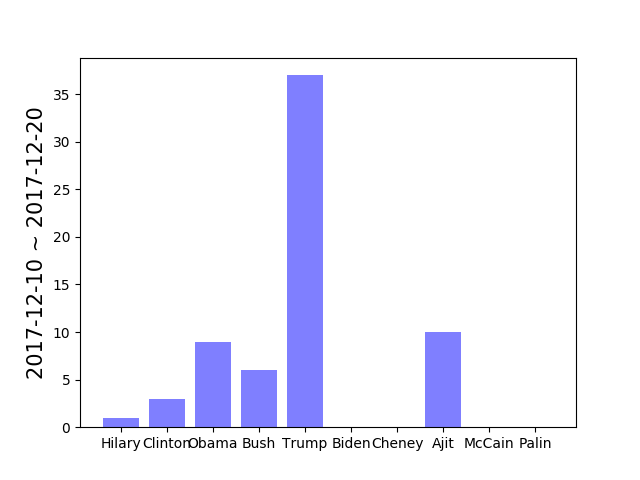

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig=plt.figure()
n = len(plt_data)
anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=500)
#plt.show()
HTML(anim.to_jshtml())

## Now export! It's a bit tricky because we want to export the animation as well. 


In [ ]:
from nbconvert import HTMLExporter
import codecs
import nbformat
exporter = HTMLExporter()
output_notebook = nbformat.read('jokes_count_blog.ipynb', as_version=4)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open('./html/jokes_count.html', 'w', encoding='utf-8').write(output)a